<a href="https://colab.research.google.com/github/Mugilan77/predictstockclose/blob/main/MugilanStockPricePredictionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'stock-market-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F541298%2F1054465%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240507%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240507T115054Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D432c1a80ec8e8ba125ad89f598763f2165edf62cd8420c17ea9f91f58fe9ac9aaee5afbbe114bdb9e0cc0d1e378632596c8d358375cdce06449db134a48b8029cc325cb729b10b9a9564fd046efeb0c52c60ce9bf05c02fded63c3727ac1d8b9b9114f6656c39ba20c9bd25fa7fdba4f9f4beca2e96dff70c6b4fc2e03e483746086fdf166e4b51d49c4cdcd617addf2e1d302c61855187be05dd90c9a77cc3270087f51f925af12d1487135ba6091b4ffa85bf34574dca87a15b7e24ebf0c3a52e3081841472c00a74f9e29ab8fb725b392a88ec0bcf5e50dc01f607d6a5a0c6df645d983361d4bb2292e361494379071ce66eb9a2e7fd75c1e5a4e9feabaec'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 547714524 bytes downloaded
Downloaded and uncompressed: stock-market-dataset
Data source import complete.


In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb #linear regression algorithm
import matplotlib.pyplot as plt #plotting result
import os
import glob

def get_df(f):
    data = pd.read_csv(f)
    data['Symbol'] = os.path.basename(f).split('.')[0]
    return data

file_list = '/kaggle/input/stock-market-dataset/etfs'
mypath = file_list + "/**/*"
path_list = glob.glob(mypath, recursive = True)
if '/kaggle/input/stock-market-dataset/symbols_valid_meta.csv' in path_list:
    path_list.remove('/kaggle/input/stock-market-dataset/symbols_valid_meta.csv')

directory_list = [a for a in path_list if os.path.isdir(a)]
# files_list contains required files
files_list = [a for a in path_list if os.path.isfile(a)]


#data = pd.read_csv('/kaggle/input/stock-market-dataset/etfs/AAAU.csv')
#data
#print(symbols_files_list)
data = pd.concat((get_df(f) for f in files_list), ignore_index = True)
#cleanup
data = data.dropna()
# data = data.drop(data[data.Open > 1e6].index)
# data = data.drop(data[data.Volume > 1e6].index)
data
print(np.isnan(data['Open']).any())
print(np.isnan(data['Volume']).any())
print(np.isinf(data['Close']).any())
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

False
False
False


<Axes: >

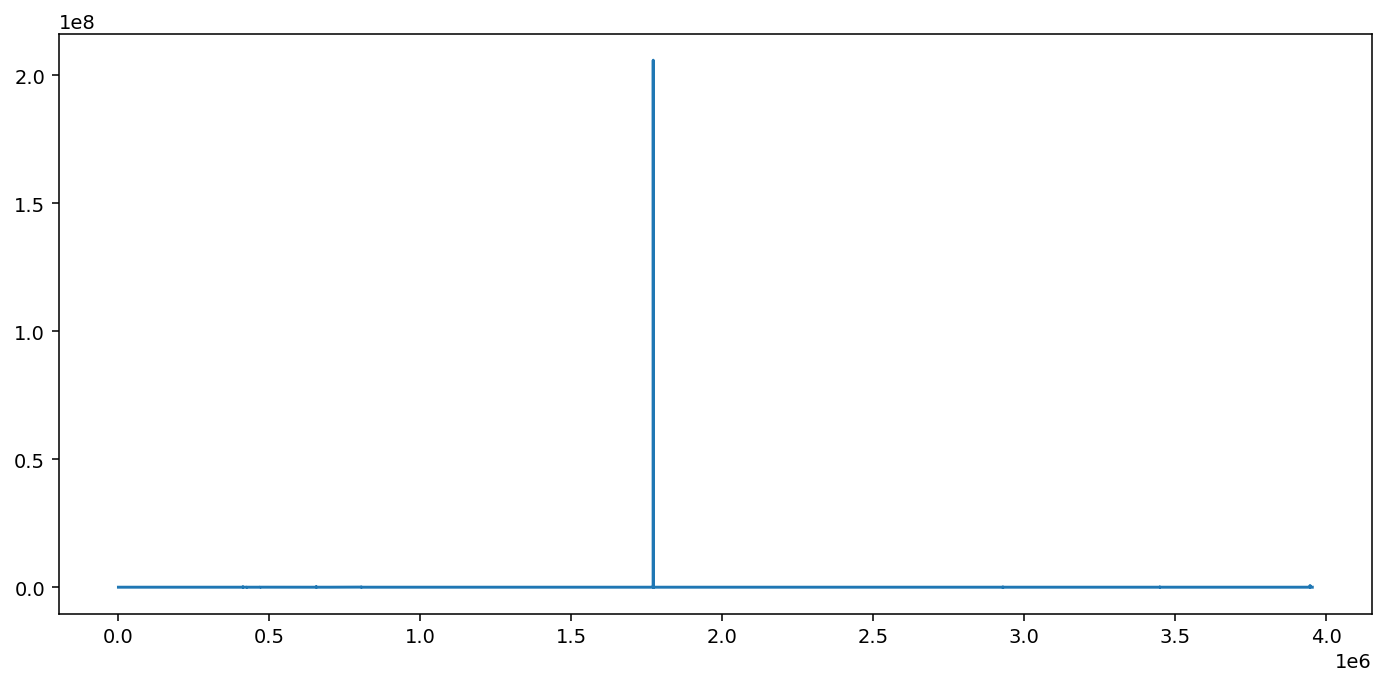

In [123]:
#representing data visually
data['Close'].plot()

In [129]:

data['Date_as_datetime'] = pd.to_datetime(data['Date'])

def number_of_days(date_1, date_2):
    return ((date_2 - date_1).astype(int)/(864*1e11)).astype(int)

date_1 =  min(data['Date_as_datetime'])
date_2 =  data['Date_as_datetime']
#print(number_of_days(date_1, date_2))

data['Days'] = number_of_days(date_1, data['Date_as_datetime'])
data['Symbol'] = data['Symbol'].astype("category")
data = data.reindex(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Symbol', 'Days'])
print(data.head)


<bound method NDFrame.head of                Date       Open       High        Low      Close  Adj Close  \
0        1998-12-22  20.781250  20.828125  20.750000  20.828125  12.881685   
1        1998-12-23  20.968750  21.140625  20.968750  21.046875  13.016976   
2        1998-12-24  21.296875  21.531250  21.203125  21.531250  13.316548   
3        1998-12-28  21.500000  21.500000  21.312500  21.343750  13.200579   
4        1998-12-29  21.734375  21.734375  21.734375  21.734375  13.442181   
...             ...        ...        ...        ...        ...        ...   
3954311  2020-03-26  27.610001  29.030001  27.610001  29.010000  29.010000   
3954312  2020-03-27  28.090000  28.840000  27.719999  28.129999  28.129999   
3954313  2020-03-30  28.160000  28.820000  27.760000  28.820000  28.820000   
3954314  2020-03-31  28.760000  29.000000  28.190001  28.389999  28.389999   
3954315  2020-04-01  27.150000  27.420000  26.620001  26.700001  26.700001   

          Volume Symbol Date_as_d

In [148]:
#splitting the data into Training and Testing Data
data = data.sample(frac=1).reset_index(drop=True)
training_ratio = 0.8
train_data = data.iloc[:int(training_ratio*len(data)), :]
test_data = data.iloc[int(training_ratio*len(data)):, :]

In [154]:
#Defining the features and target variable
features = ['Open', 'Volume', 'Days', 'Symbol']
target = 'Close'

In [155]:
#creating and training the model
from sklearn.preprocessing import StandardScaler
model = xgb.XGBRegressor(enable_categorical = True)
'''
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data[features])
model.fit(train_data_scaled, train_data[target])
'''
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
#making and showing the predictions on the testing data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[ 55.807625  58.0188    23.772913 ...  25.075035  25.075035 101.26559 ]


In [157]:
#Showing the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
3163425    54.139999
3163426    59.549999
3163427    22.520000
3163428    94.699997
3163429    47.080002
             ...    
3954277    29.049999
3954278    69.870003
3954279    25.021999
3954280    24.860001
3954281    99.269997
Name: Close, Length: 790857, dtype: float64


In [158]:
#Accuracy of the model
accuracy = model.score(test_data[features], test_data[target])
print('accuracy:')
print(accuracy)

accuracy:
0.963445920797098


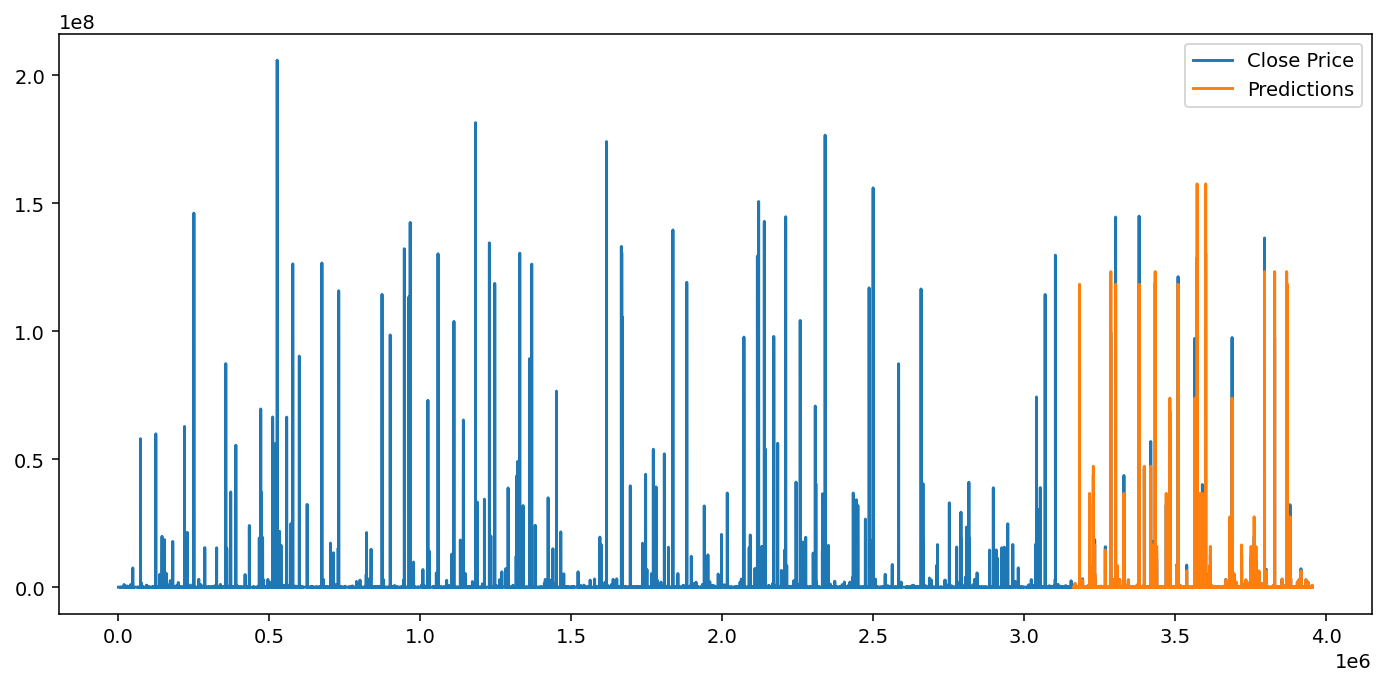

In [159]:
#plotting the predictions and the close price
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 140
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()
